<a href="https://colab.research.google.com/github/PabloDome/Microcopio/blob/main/BobinasHemholtz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

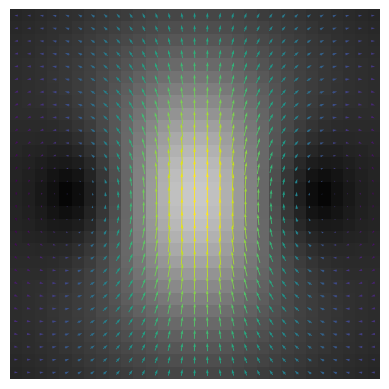

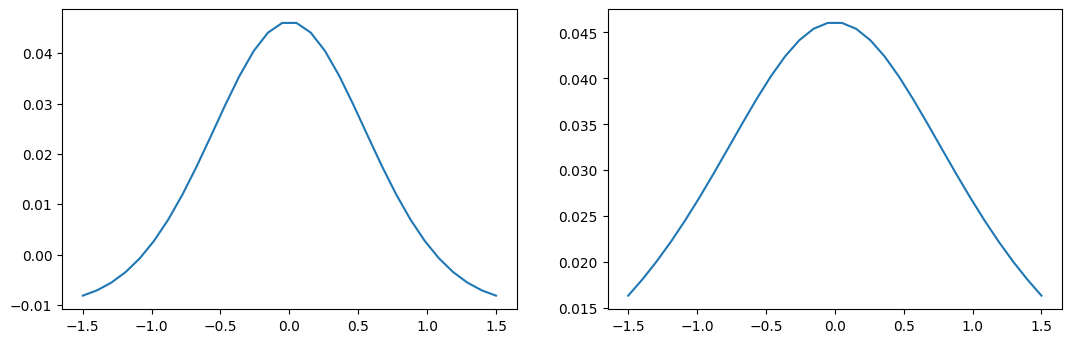

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Tomo el eje z como el eje de las espiras

e = 0.05 # Diametro del alambre en cm
N_bob = 1 # Cantidad de espiras en el plano xy
N_z = 1 # Cantidad de espiras en el eje z
Rad_bob = 0.3 # Radio de la bobina interna en cm
Pos_max = 3 #Distancia maxima de zoneo en cm
Tam = 30 #Tamaño de la discretización del espacio
I = 2 # Corriente en A

B_x = np.zeros((Tam,Tam))
B_z = np.zeros((Tam,Tam))

Btot_x = np.zeros((Tam,Tam))
Btot_z = np.zeros((Tam,Tam))

B_punto = np.zeros(3)
r = np.zeros(3)

Bx = np.zeros((Tam,Tam))
Bz = np.zeros((Tam,Tam))

def BitSabart(r, r_bob, Radio_bob): #Es necesario que Radio_bob este en m
  # Por practicidad voy a calcular el campo en xz, pero agregando la linea comentada se puede hacer en 3d
  C = 0.01*I*Radio_bob
  theta = np.linspace(0, 2*np.pi, num=100) # num es la cantidad de divisiones de integración
  Bx = C*np.trapz((r_bob[2]-r[2])*np.cos(theta)/pow((pow(r_bob[0]-r[0]+Radio_bob*np.cos(theta),2)+
                                                                 pow(r_bob[1]-r[1]+Radio_bob*np.sin(theta),2)+
                                                                 pow(r_bob[2]-r[2],2)),3/2), theta)
  #By = C*np.trapz((r_bob[2]-r[2])*np.sin(theta)/pow((pow(r_bob[0]-r[0]+Radio_bob*np.cos(theta),2)+
  #                                                               pow(r_bob[1]-r[1]+Radio_bob*np.sin(theta),2)+
  #                                                               pow(r_bob[2]-r[2],2)),3/2), theta)
  Bz = C*np.trapz(((r[1]-r_bob[1])*np.sin(theta)+(r[0]-r_bob[0])*np.cos(theta)-Radio_bob)/pow((pow(r_bob[0]-r[0]+Radio_bob*np.cos(theta),2)+
                                              pow(r_bob[1]-r[1]+Radio_bob*np.sin(theta),2)+
                                              pow(r_bob[2]-r[2],2)),3/2), theta)

  B = np.array([Bx, 0, Bz])

  return B

def Espira(a, pos_bob):

  B_p = B_punto*0

  for i in range(Tam):
    for j in range(Tam):
      r = [(i-(Tam-1)*0.5)*2*(Pos_max/100)/Tam, ((Tam-1)*0.5)*2*(Pos_max/100)/Tam, (j-(Tam-1)*0.5)*2*(Pos_max/100)/Tam]
      B_p = BitSabart(r, pos_bob, a)
      B_x[i,j] = B_p[0]
      B_z[i,j] = B_p[2]

  return  B_x, B_z


def Bobina():

  Distancia_bobs = Rad_bob*0.5   #Posición de la espira en cm
  B_x_tot = B_x*0
  B_z_tot = B_z*0
  r_bob = r*0

  for i in range(N_bob):
    a = Rad_bob + i*e
    for j in range(N_z):

      r_bob[2] = Distancia_bobs + j*e
      Bx, Bz = Espira(a/100, r_bob/100)
      B_x_tot = Bx + B_x_tot
      B_z_tot = Bz + B_z_tot

  return B_x_tot, B_z_tot

B_x, B_z = Bobina()

for i in range(Tam):
  for j in range(Tam):
    Btot_x[i,j] = B_x[i,j] + B_x[Tam-i-1,Tam-j-1]
    Btot_z[i,j] = B_z[i,j] + B_z[Tam-i-1,Tam-j-1]


Int_Campo = np.sqrt(Btot_x*Btot_x+Btot_z*Btot_z)


z, x = np.meshgrid(np.linspace(0, Tam, Tam), np.linspace(0, Tam, Tam))
plt.quiver(z, x, Btot_x, Btot_z, np.arctan(Btot_z/np.max(Btot_z)), pivot='mid',color='g')
plt.imshow(abs(Int_Campo*200/np.max(Int_Campo)), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 3)
fig.subplots_adjust(left = 0.0, right=1.0, bottom=0.0, top=1.0, hspace = 0.0, wspace = 0.2)

plt.subplot(1,2,1)
plt.plot((z[int(Tam/2),:]-Tam/2)*Pos_max/Tam, Btot_z[int(Tam/2),:])
#plt.plot((z[int(Tam/2),int(Tam/2)]-Tam/2)*Pos_max/Tam, Btot_z[int(Tam/2),int(Tam/2)],'ro')

plt.subplot(1,2,2)
plt.plot((x[:,int(Tam/2)]-Tam/2)*Pos_max/Tam, Btot_z[:,int(Tam/2)])
#plt.plot((z[int(Tam/2),int(Tam/2)]-Tam/2)*Pos_max/Tam, Btot_z[int(Tam/2),int(Tam/2)],'ro')


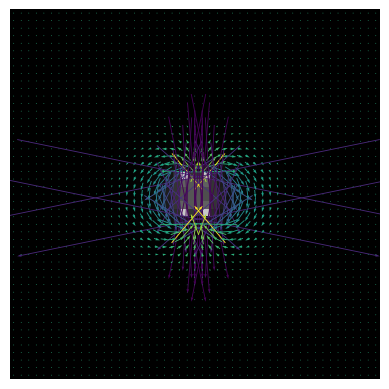

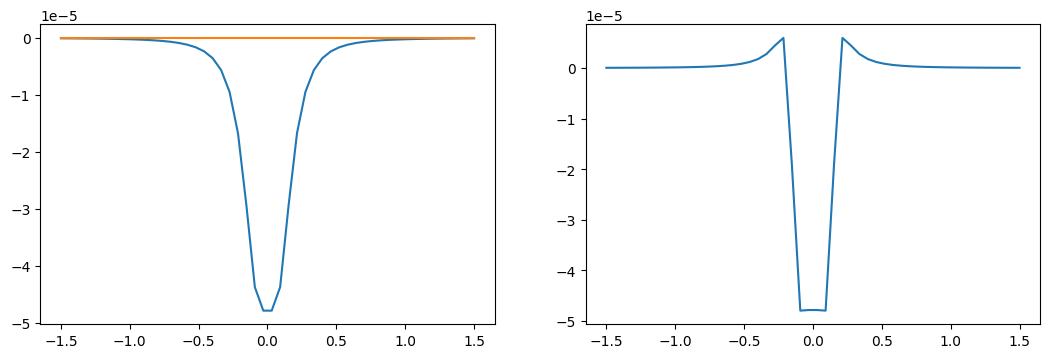

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Tomo el eje z como el eje de las espiras

e = 0.05 # Diametro del alambre en cm
N_bob = 1 # Cantidad de espiras en el plano xy
N_z = 1 # Cantidad de espiras en el eje z
Rad_bob = 0.3 # Radio de la bobina interna en cm
Pos_max = 3 #Distancia maxima de zoneo en cm
Tam = 50 #Tamaño de la discretización del espacio
I = 2 # Corriente en A

B_x = np.zeros((Tam,Tam))
B_z = np.zeros((Tam,Tam))

Btot_x = np.zeros((Tam,Tam))
Btot_z = np.zeros((Tam,Tam))

B_punto = np.zeros(3)

def BS_x(ang, r_bob, r, Radio_bob):
  BiSav_x = (r_bob[2]-r[2])*np.cos(ang)/pow((pow(r_bob[0]-r[0]+Radio_bob*np.cos(ang),2)+
                                                                 pow(r_bob[1]-r[1]+Radio_bob*np.sin(ang),2)+
                                                                 pow(r_bob[2]-r[2],2)),3/2)
  return BiSav_x

def BS_y(ang, r_bob, r, Radio_bob):
  BiSav_y = (r_bob[2]-r[2])*np.sin(ang)/pow((pow(r_bob[0]-r[0]+Radio_bob*np.cos(ang),2)+
                                                                 pow(r_bob[1]-r[1]+Radio_bob*np.sin(ang),2)+
                                                                 pow(r_bob[2]-r[2],2)),3/2)
  return BiSav_y

def BS_z(theta, r_bob, r, Radio_bob):
  BiSav_z = ((r[1]-r_bob[1])*np.sin(theta)+(r[0]-r_bob[0])*np.cos(theta)-Radio_bob)/pow((pow(r_bob[0]-r[0]+Radio_bob*np.cos(theta),2)+
                                              pow(r_bob[1]-r[1]+Radio_bob*np.sin(theta),2)+
                                              pow(r_bob[2]-r[2],2)),3/2)
  return BiSav_z

def BitSabart(I, r, r_bob, Radio_bob): #Es necesario que Radio_bob este en m
  # Por practicidad voy a calcular el campo en xz, pero agregando la linea comentada se puede hacer en 3d
  C = pow(10,-7)*I*Radio_bob/(4*np.pi)
  theta = theta = np.linspace(0, 2 * np.pi, num=1000, endpoint=True) # num es la cantidad de divisiones de integración

  Bx = C*np.trapz(BS_x(theta, r_bob, r, Radio_bob),theta)
  Bz = C*np.trapz(BS_z(theta, r_bob, r, Radio_bob),theta)

  B = np.array([Bx, 0, Bz])

  return B

def Espira_punto(r, pos_bob):

  B_p = B_punto*0
  r_bob_0 = pos_bob

  for i in range(N_bob):
    for j in range(N_z):
      r_bob_0[2] = pos_bob[2] + j*(e/100)
      B_p = B_p + BitSabart(I, r, r_bob_0, (Rad_bob+i*e)/100)

  return  B_p


def Bobina():
  B_x = np.zeros((Tam,Tam))
  B_z = np.zeros((Tam,Tam))
  Distancia_bobs = Rad_bob*0.5   #Posición de la espira en cm

  r_bob = np.array([0, 0, Distancia_bobs])

  for i in range(Tam):
    for j in range(Tam):
      r = np.array([(i-(Tam-1)*0.5)*2*(Pos_max/100)/Tam, 0, (j-(Tam-1)*0.5)*2*(Pos_max/100)/Tam])
      B_punto = Espira_punto(r, r_bob/100)
      B_x[i,j] = B_punto[0]
      B_z[i,j] = B_punto[2]

  return B_x, B_z

def Espira_solucion():
  X = (z[int(Tam/2),:]-Tam/2)*Pos_max/(Tam/100)
  Bz_ideal = X*0

  for i in range(len(X)):
    Bz_ideal[i] = 0.01*I*(Rad_bob/100)*0.5*(Rad_bob/100)/pow(pow(X[i],2)+pow(Rad_bob/100,2),3/2)

    return Bz_ideal

B_x, B_z = Bobina()

for i in range(Tam):
  for j in range(Tam):
    Btot_x[i,j] = B_x[i,j] + B_x[Tam-i-1,Tam-j-1]
    Btot_z[i,j] = B_z[i,j] + B_z[Tam-i-1,Tam-j-1]


Int_Campo = np.sqrt(Btot_x*Btot_x+Btot_z*Btot_z)


z, x = np.meshgrid(np.linspace(0, Tam, Tam), np.linspace(0, Tam, Tam))
plt.quiver(z, x, Btot_x, Btot_z, np.arctan(Btot_z/np.max(Btot_z)), pivot='mid',color='g')
plt.imshow(abs(Int_Campo*200/np.max(Int_Campo)), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 3)
fig.subplots_adjust(left = 0.0, right=1.0, bottom=0.0, top=1.0, hspace = 0.0, wspace = 0.2)

plt.subplot(1,2,1)
plt.plot((z[int(Tam/2),:]-Tam/2)*Pos_max/Tam, Btot_z[int(Tam/2),:])
plt.plot((z[int(Tam/2),:]-Tam/2)*Pos_max/Tam,Espira_solucion())
#plt.plot((z[int(Tam/2),int(Tam/2)]-Tam/2)*Pos_max/Tam, Btot_z[int(Tam/2),int(Tam/2)],'ro')

plt.subplot(1,2,2)
plt.plot((x[:,int(Tam/2)]-Tam/2)*Pos_max/Tam, Btot_z[:,int(Tam/2)])
#plt.plot((z[int(Tam/2),int(Tam/2)]-Tam/2)*Pos_max/Tam, Btot_z[int(Tam/2),int(Tam/2)],'ro')
